In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import squarify as sqrf

### Import the data set 

In [2]:
# create a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Instacart Basket Analysis'

# import the file orders_products_customer_combined.pkl into the data frame
df_ords_prods_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_final_dataset.pkl'))

### Additional Analysis - 1

Instacart has a lot of products with different price tags.
Marketing and sales want to use simpler price range groupings to help direct their efforts.

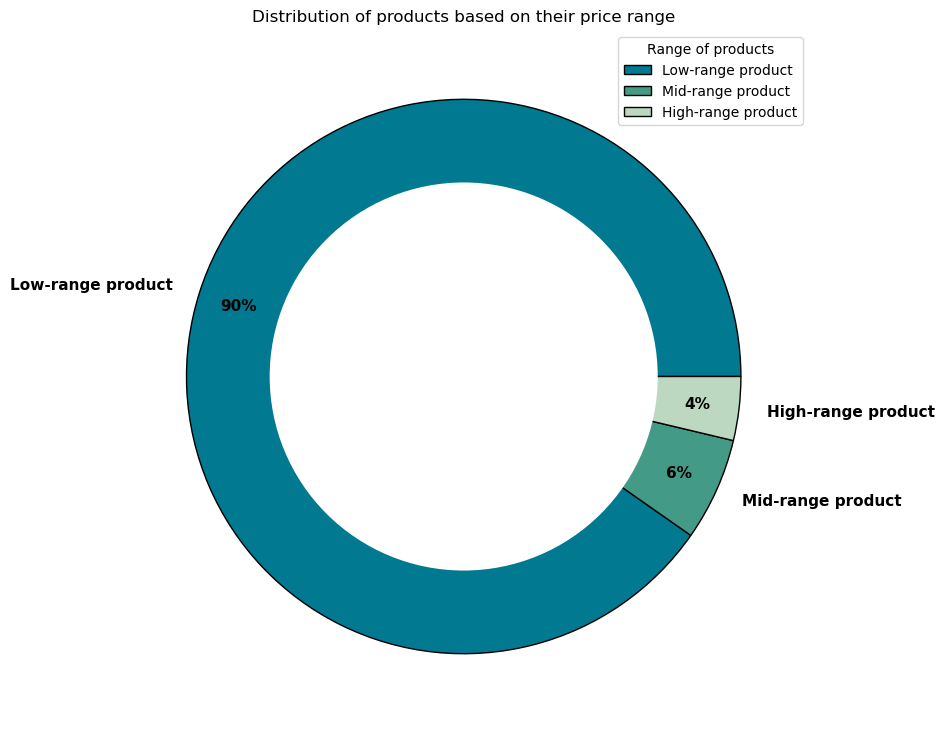

In [15]:
#create product groups
pdt_range_counts = df_ords_prods_cust['price_range_loc'].value_counts()
mycolors = ["#007991", "#439a86", "#bcd8c1"]


#Pie Chart
plt.figure(figsize = (10,9))
plt.pie(pdt_range_counts,
        labels = pdt_range_counts.index,
        colors = mycolors,
        autopct = '%.0f%%',
        pctdistance=0.85,
        textprops=dict(color='k', weight='bold', fontsize=11),
        wedgeprops = {'edgecolor' : 'black'} # boarders
       )

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Distribution of products based on their price range')
plt.legend(title = 'Range of products')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'product_price_range_groups.png')) # Save
plt.show()

### Additional Analysis - 2

Are there certain types of products that are more popular than others? The marketing
and sales teams want to know which departments have the highest frequency of
product orders.

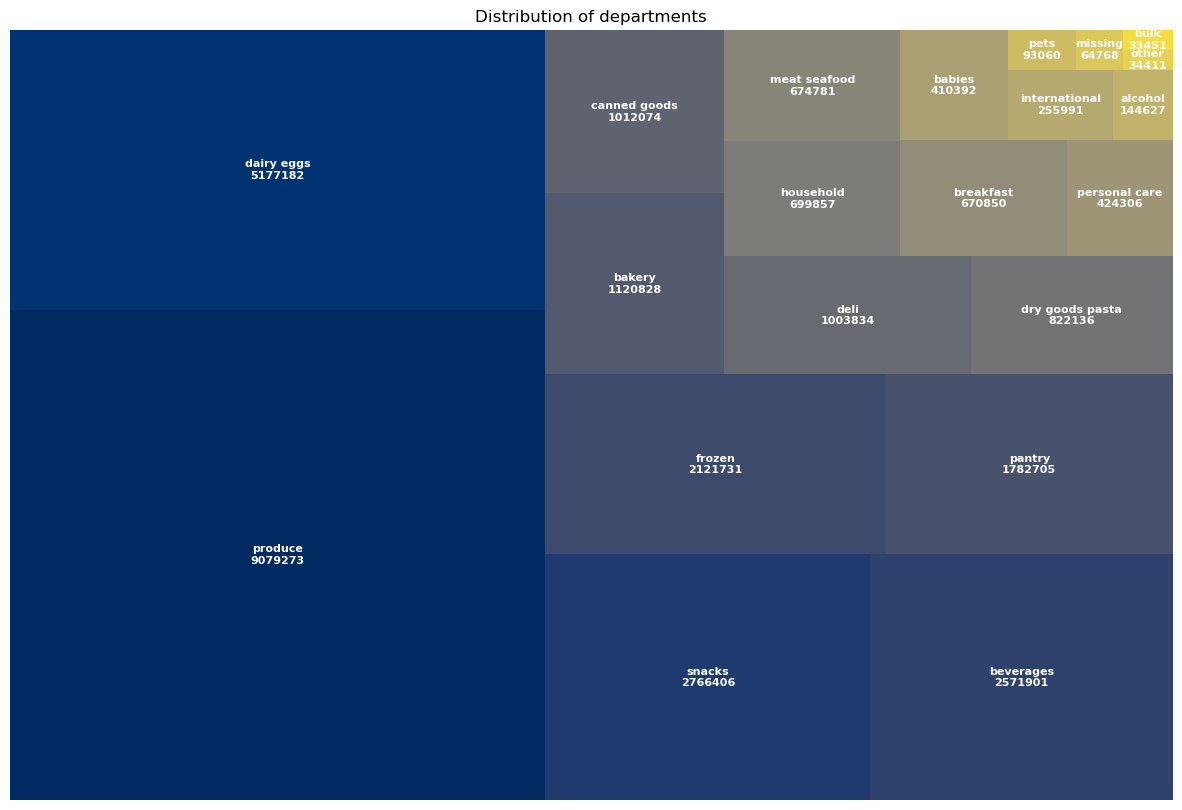

In [4]:
# create a dataframe whicg contains for each departments its corresponding count of orders
df_dept_viz = df_ords_prods_cust.groupby('department')['order_number'].count().reset_index()
df_dept_viz.columns=['department', 'order_number']
df_dept_viz = df_dept_viz.sort_values(by='order_number', ascending= False)

# plot the treemap
plt.figure(figsize = (15,10))
labels = [f'{department}\n{order_number}' for department, order_number in zip(df_dept_viz.department, df_dept_viz['order_number'])]
sqrf.plot(sizes=df_dept_viz['order_number'], label=labels ,text_kwargs={'color': 'white','fontweight': 'bold', 'fontsize':8},color=sns.color_palette('cividis', n_colors=len(df_dept_viz['department'])))

plt.axis('off')
plt.title('Distribution of departments')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'treemap_dept_orders.png')) # Save
plt.show()


### Additional Analysis - 3

What’s the distribution among users in regards to their brand loyalty (i.e., how
often do they return to Instacart)?

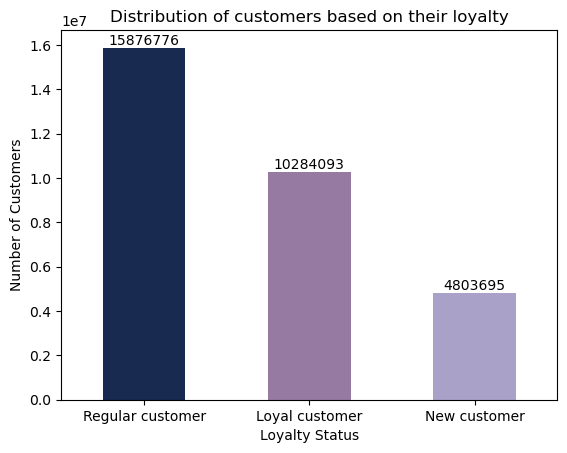

In [5]:
# Create a bar chart from the “loyalty_flag” column
bar_cust_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = ['#192a51','#967aa1', '#aaa1c8'], xlabel = 'Loyalty Status', ylabel = 'Number of Customers', title = 'Distribution of customers based on their loyalty')

# labelling the count of customers in the bar chart 
for p in bar_cust_loyalty.patches:
    height = p.get_height()
    bar_cust_loyalty.annotate( "{}".format(height),(p.get_x() + p.get_width()/2, height+.05),ha="center",va="bottom",fontsize=10)

# rotating the xlabel for readability
plt.xticks(rotation=360, ha='center')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customer_loyalty_status.png')) # Save
plt.show()

#### Note: Regular customers are more in number compared to loyal and new customers

### Additional Analysis - 4

Are there differences in ordering habits based on a customer’s loyalty status

In [6]:
# Finding the relation between loyalty of the customer and ordering habits
crosstab_order_loyality = pd.crosstab(df_ords_prods_cust['loyalty_flag'], df_ords_prods_cust['spending_flag'], dropna = False)
crosstab_order_loyality

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84011,4719684
Regular customer,302814,15573962


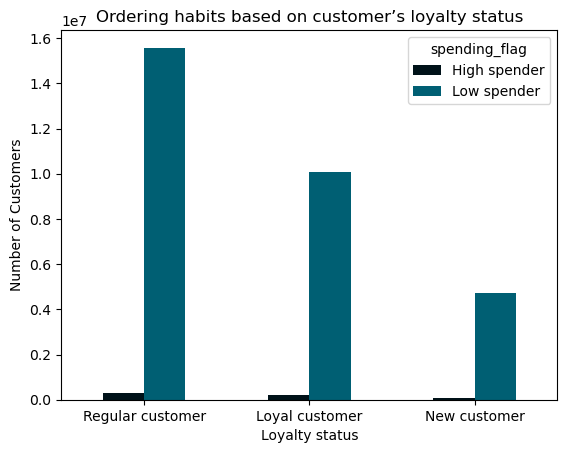

In [7]:
# plot the relationship using a bar chart
mycolors = ['#001219','#005f73']
crosstab_order_loyality = crosstab_order_loyality.sort_values(['High spender'], ascending=False)
crosstab_order_loyality.plot.bar(color = mycolors)
plt.title('Ordering habits based on customer’s loyalty status')
plt.xlabel('Loyalty status')
plt.ylabel('Number of Customers')
# rotating the xlabel for readability
plt.xticks(rotation=360, ha='center')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'ordering_and_loyalty_status.png')) # Save
plt.show()

#### Note: Low spenders are more compared to High spenders in each category of customers based on their loyalty

### Additional Analysis - 5

Is there a connection between age and family status in terms of ordering 
habits?

In [8]:
# finding relation between age and ordering habits
crosstab_order_age = pd.crosstab(df_ords_prods_cust['age_group'], df_ords_prods_cust['spending_flag'], dropna = False)
crosstab_order_age

spending_flag,High spender,Low spender
age_group,,
Adults,337638,16613779
Elderly,156886,8038658
Young Adults,108901,5708702


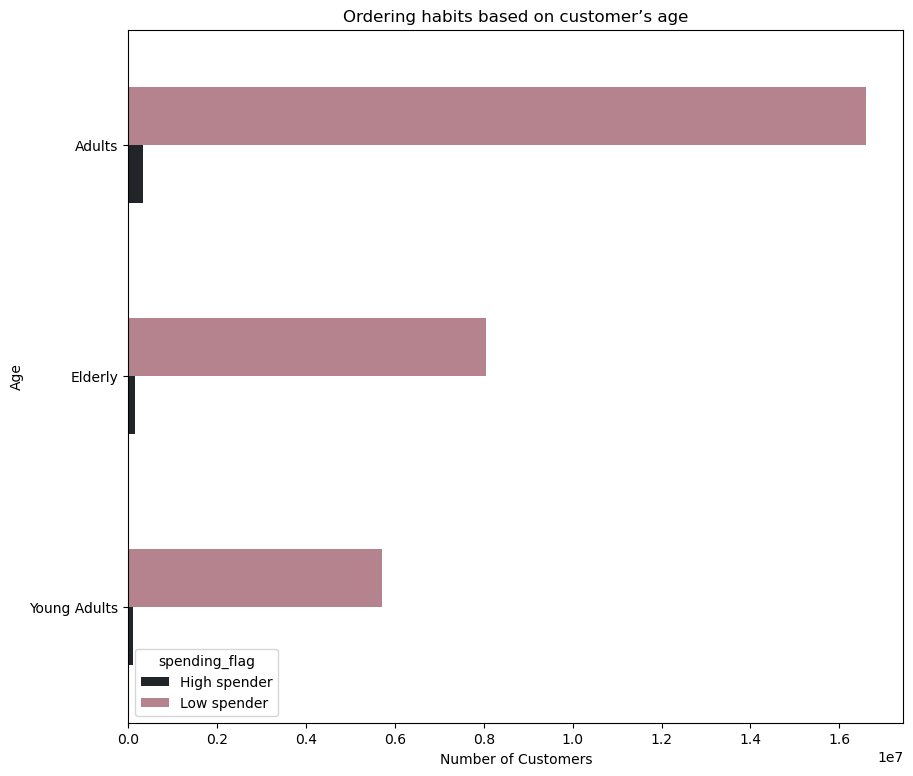

In [16]:
# plot the relationship using a bar chart
mycolors = ['#212529','#b5838d']
crosstab_order_age = crosstab_order_age.sort_values(['High spender'], ascending=True)
crosstab_order_age.plot.barh(color = mycolors, figsize = (10,9))

plt.xlabel('Number of Customers')
plt.ylabel('Age')
# rotating the xlabel for readability
plt.xticks(rotation=360, ha='center')
plt.title('Ordering habits based on customer’s age', loc = 'center')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'ordering_and_age_relation.png')) # Save
plt.show()

In [10]:
# finding relation between age and ordering habits
crosstab_order_family_status = pd.crosstab(df_ords_prods_cust['dependants_flag'], df_ords_prods_cust['spending_flag'], dropna = False)
crosstab_order_family_status

spending_flag,High spender,Low spender
dependants_flag,,
Has dependants,457383,22767500
No dependants,146042,7593639


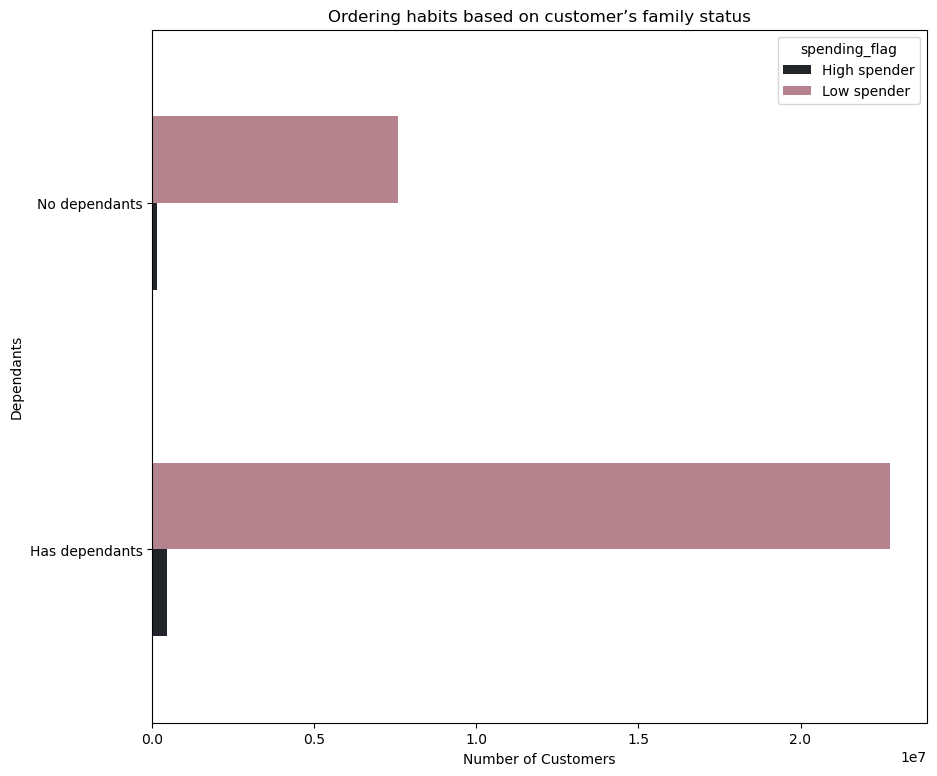

In [17]:
# plot the relationship using a bar chart
mycolors = ['#212529','#b5838d']
crosstab_order_family_status.plot.barh(color = mycolors, figsize = (10,9))

plt.xlabel('Number of Customers')
plt.ylabel('Dependants')
# rotating the xlabel for readability
plt.xticks(rotation=360, ha='center')
plt.title('Ordering habits based on customer’s family status', loc = 'center')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'ordering_and_family_status_relation.png')) # Save
plt.show()